# Step 1: Data Preparation



## 1.1 Load the Dataset

In [1]:
pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [4]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalizes the tensor
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 42194150.91it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1091578.08it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9462054.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5057214.96it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Transforms:
* ToTensor(): Converts the image from a PIL Image or numpy array to a PyTorch tensor.

* Normalize(mean, std): Normalizes the image tensor with the given mean and standard deviation. This standardization helps in speeding up the training and achieving better convergence by ensuring that the input data has a mean of 0 and a standard deviation of 1.

## 1.2 Create DataLoader
* DataLoader is used to load the dataset in batches, which makes the training process more efficient.

In [5]:
from torch.utils.data import DataLoader, random_split

# Define the split ratio for the validation set
validation_split_ratio = 0.2
train_size = int((1 - validation_split_ratio) * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the train_dataset into training and validation sets
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders for training, validation, and test sets
train_loader = DataLoader(dataset=train_subset, batch_size=64, shuffle=True)
validation_loader = DataLoader(dataset=val_subset, batch_size=500, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


### DataLoader:

* 80:20 ratio split of train_dataset into train_subset, val_subset

* train_loader: Loads the train_subset in batches of 64 images and shuffles them to ensure that the model doesn't learn the order of the data.

* test_loader: Loads the test data in batches of 1000 images for evaluation purposes.

* validation_loader: Loads val_subset in batches of 500 images and shuffles them to ensure that the moedl doesn't learn the order of the data.

# Step 2: Data Visualization and Exploration

## 2.1 Visualize the Dataset
* Visualizing the data helps in understanding what the input images look like.

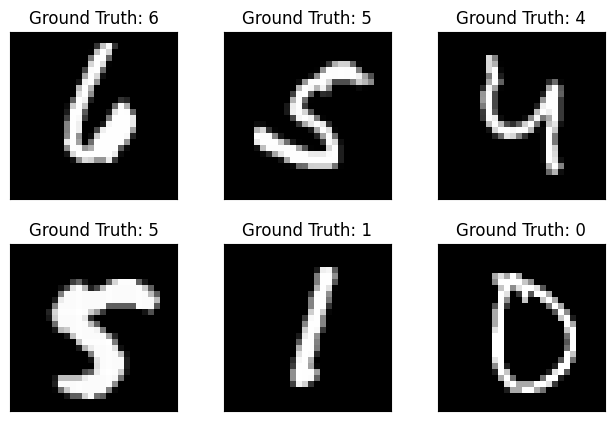

In [6]:
import matplotlib.pyplot as plt

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Ground Truth: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()


### Visualization:
* We take a batch of images from the train_loader.
* Plot the first 6 images in a 2x3 grid using Matplotlib.
* 1This gives a visual confirmation that our data is loaded and preprocessed correctly.

## 2.2 Explore Data Size and Shape

* Exploring the size and shape ensures that the data matches the expected input dimensions for the neural network.
* This prints the shape of a batch of images, which should be (64, 1, 28, 28) for the training loader, indicating 64 images of size 28x28 pixels with 1 color channel (grayscale).

In [12]:
print(example_data.shape) # Should output (batch_size, 1, 28, 28)

torch.Size([64, 1, 28, 28])


# Step 3: Building and Training the Neural Network

## 3.1 Build the Neural Network
* We define a simple fully connected neural network (also called a feedforward neural network).


In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)  # for MNIST dataset (28*28)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = Net()


## 3.2 Create an Optimizer
* An optimizer is used to update the weights of the network based on the computed gradients.

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

* Adam Optimizer: An adaptive learning rate optimization algorithm that's popular for its efficiency and performance. The learning rate is set to 0.001.

## 3.3 Train the Network
* The training loop processes each batch of training data, computes the loss, performs backpropagation, and updates the weights.

In [9]:
epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Regularization (Dropout)
dropout = torch.nn.Dropout(p=0.5)

for epoch in range(epochs):
    # Training phase
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

        if batch_idx % 100 == 0:
            accuracy = 100. * correct / total
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}\tAccuracy: {accuracy:.4f}%')

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100. * correct / total)

    # Validation phase
    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0
    with torch.no_grad():
        for data, target in validation_loader:
            output = model(data)
            loss = F.nll_loss(output, target, reduction='sum').item()
            val_loss += loss
            _, predicted = torch.max(output.data, 1)
            val_total += target.size(0)
            val_correct += (predicted == target).sum().item()

    val_losses.append(val_loss / val_total)
    val_accuracies.append(100. * val_correct / val_total)
    print(f'\nValidation set: Epoch: {epoch} Average loss: {val_loss / val_total:.4f}, Accuracy: {val_correct}/{val_total} ({100. * val_correct / val_total:.4f}%)\n')


Train Epoch: 0 [0/48000 (0%)]	Loss: 2.272760	Accuracy: 12.5000%
Train Epoch: 0 [6400/48000 (13%)]	Loss: 0.717398	Accuracy: 61.1850%
Train Epoch: 0 [12800/48000 (27%)]	Loss: 0.433736	Accuracy: 72.8001%
Train Epoch: 0 [19200/48000 (40%)]	Loss: 0.320363	Accuracy: 78.0835%
Train Epoch: 0 [25600/48000 (53%)]	Loss: 0.196594	Accuracy: 81.1331%
Train Epoch: 0 [32000/48000 (67%)]	Loss: 0.240288	Accuracy: 83.1462%
Train Epoch: 0 [38400/48000 (80%)]	Loss: 0.182470	Accuracy: 84.5466%
Train Epoch: 0 [44800/48000 (93%)]	Loss: 0.353139	Accuracy: 85.5965%

Validation set: Epoch: 0 Average loss: 0.1738, Accuracy: 11375/12000 (94.7917%)

Train Epoch: 1 [0/48000 (0%)]	Loss: 0.095596	Accuracy: 96.8750%
Train Epoch: 1 [6400/48000 (13%)]	Loss: 0.258926	Accuracy: 93.4406%
Train Epoch: 1 [12800/48000 (27%)]	Loss: 0.186827	Accuracy: 93.4546%
Train Epoch: 1 [19200/48000 (40%)]	Loss: 0.092838	Accuracy: 93.6410%
Train Epoch: 1 [25600/48000 (53%)]	Loss: 0.182763	Accuracy: 93.6097%
Train Epoch: 1 [32000/48000 (67%)

### Training Loop:
* For each epoch, the model is set to training mode.
* For each batch, gradients are reset, forward pass is performed, loss is computed, backpropagation is done, and optimizer updates the weights.
* The loss is printed every 100 batches for monitoring progress.

In [10]:
for i in val_losses:
  print(i)

0.17375869623819987
0.12241416962941487
0.10589571015040079
0.09473549286524455
0.08761748758951823
0.08129557609558105
0.07817903470993041
0.07572003507614136
0.07580756092071533
0.07586226002375285


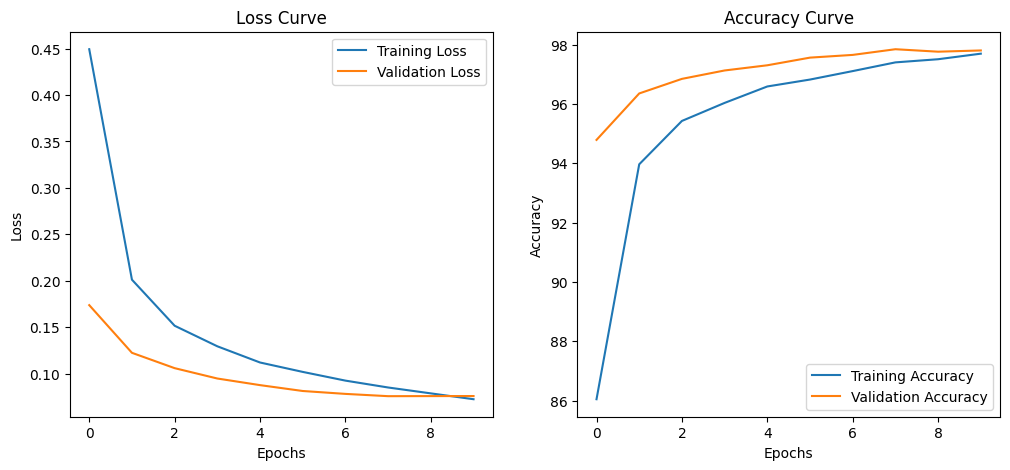

In [11]:
# Plotting the loss and accuracy curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

## Step 4: Model Evaluation and Hyperparameter Tuning

### 4.1 Evaluate the Network
* After training, we evaluate the network on the test dataset to see how well it performs.

In [12]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
accuracy = 100. * correct / len(test_loader.dataset)

print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')



Test set: Average loss: 0.0747, Accuracy: 9779/10000 (98%)



### Evaluation:
* The model is set to evaluation mode.
* The test data is processed without computing gradients (no_grad()), reducing memory usage and speeding up computations.
* The total loss and number of correct predictions are accumulated.
* The average loss and accuracy are calculated and printed.

In [13]:
torch.save(model.state_dict(), 'mnist_model_modified.pth')